# Algoritmo CuánticoCon
Construir un QGA para determinar el máximo de la función:

$f(x)= | \frac{x-5}{2+\sin(x)} | $

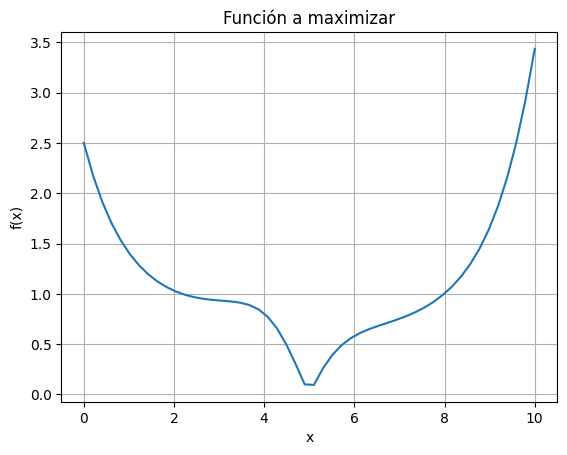

In [91]:
import matplotlib.pyplot as plt
import numpy as np 

def f(x):
    return abs((x - 5) / (2 + np.sin(x)))


x = np.linspace(0, 10, 50)
y = f(x)
plt.plot(x, y)
plt.title("Función a maximizar")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()



In [92]:
# FUNCION QUE INICIALIZA LAS APLITUDES DE PROBABILIDAD
# Al principio todas las amplitudes son iguales a 1/sqrt(2)

def amplitudes_probabilidad(tamaño_poblacion, n_qbits):
    poblacion = np.full((tamaño_poblacion, n_qbits), 1/np.sqrt(2))
    return poblacion



In [93]:
# FUNCION QUE COLAPSARÁ LAS AMPLITUDES  A 0 O 1 MEDIANTE UN NÚMERO ALEATORIO
def generar_soluciones(amplitudes):
    renglon, columnas = amplitudes.shape
    matriz_binaria = np.zeros((renglon, columnas), dtype=int)
    matriz_aleatoria = np.random.rand(renglon, columnas)
    
    for i in range(renglon):
        for j in range(columnas):
            if (matriz_aleatoria[i][j] < amplitudes[i][j]**2):
                matriz_binaria[i,j] = 1
            else:
                matriz_binaria[i,j] = 0

    return matriz_binaria


In [94]:
# FUNCION PARA EVOLUCIONAR LA POBLACION DE INDIVIDUOS MEDIANTE ROTATION-GATE

def rotation_gate(soluciones, mejor_solucion, amplitudes_probabilidad):
    renglones , columnas = soluciones.shape
    
    theta = np.pi/50

    for i in range(renglones):
        for j in range(columnas):
            if soluciones[i,j] != mejor_solucion[j]:
                if mejor_solucion[j] == 1:
                    amplitudes_probabilidad[i,j] = amplitudes_probabilidad[i,j] + np.sin(theta) * (1-amplitudes_probabilidad[i,j])
                else:
                    amplitudes_probabilidad[i,j] = amplitudes_probabilidad[i,j] - np.sin(theta) * amplitudes_probabilidad[i,j]

    amplitudes_probabilidad = np.clip(amplitudes_probabilidad, 0.05, 0.95)
    return amplitudes_probabilidad

In [95]:
# FUNCION QUE IMPLEMENTA EL OPERADOR MUTATION-GATE
def mutation_gate(amplitudes_probabilidad, prob_mutacion):
    renglones , columnas = amplitudes_probabilidad.shape
    matriz_auxiliar = np.random.rand(renglones,columnas)
    mascara = np.zeros((renglones,columnas), dtype=bool)

    for i in range(renglones):
        for j in range(columnas):
            if matriz_auxiliar[i,j] < prob_mutacion:
                mascara[i,j] = True
            else:
                mascara[i,j] = False

    amplitudes_probabilidad = np.where(mascara, 1-amplitudes_probabilidad, amplitudes_probabilidad)
    return amplitudes_probabilidad





In [ ]:
# ALGORITMO GENETICO CUANTICO


# =============================== PARAMETROS INCIALES ===============================
tamaño_poblacion = 6
numero_qbits = 10
generaciones = 10
porcentaje_mutacion = 0.05
min = -10
max = 10


# =============================== INICIALIZACION ===============================
# POBLACION INICIAL
matriz_probabilidades = amplitudes_probabilidad(tamaño_poblacion, numero_qbits)
mejor_solucion = np.zeros(numero_qbits, dtype=int)
mejor_fitness = float('-inf')

for generacion in range(generaciones):
    soluciones = generar_soluciones(matriz_probabilidades)

    aptitud = None

    actual_mejor_fitness = None

    if actual_mejor_fitness < mejor_fitness:
        mejor_fitness = actual_mejor_fitness
        mejor_solucion = actual_mejor_fitness
    
    matriz_probabilidades = rotation_gate(soluciones, mejor_solucion, matriz_probabilidades)
    matriz_probabilidades = mutation_gate(matriz_probabilidades, porcentaje_mutacion)


Amplitudes iniciales: [[0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]]
Soluciones generadas:
 [[0 0 1 1 1]
 [1 1 0 0 0]
 [0 0 0 0 0]
 [1 1 1 0 1]
 [0 1 0 1 1]
 [1 1 0 1 0]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [0 1 1 0 1]
 [1 0 1 1 1]]
